In [35]:
from py2neo import Node, Relationship, Graph
from numpy.random import rand
import numpy as num
from bokeh.plotting import output_notebook,figure, show
from bokeh.layouts import row,column,gridplot
from bokeh.models import Label
import numpy as np
from curve import *
from bokeh.models import Span
output_notebook()

Loading BokehJS ...

In [36]:
import pickle as pk
A = pk.load(open('global.pk','rb'))
env = [xx['envelope'] for xx in A]
flat_list = [item for sub in env for item in sub]
x = [xx[0] for xx in flat_list if xx[0]>1]
y = [xx[1] for xx in flat_list if xx[0]>1]

# Scatter plot for all envelope

In [37]:
s = figure(plot_width=500, plot_height=500,y_axis_label = "Probability(log scale)",x_axis_label = "Distance")
s.circle(x,y)
show(s)

# 2D Denisty plot for envelope points

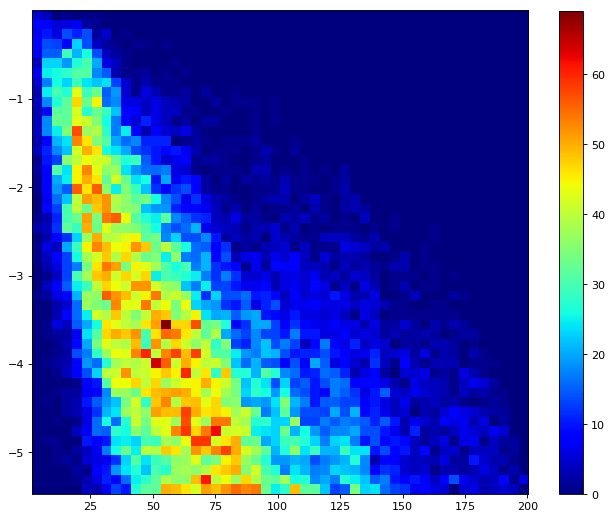

In [38]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Big bins
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [39]:
def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, x, y,maxfev = 10000)

In [40]:
z = [func(xx,*popt) for xx in x]
residuals = [(y[q] - z[q])**2 for q in range(len(z))]
ss_res = num.sum(residuals)
ss_tot = num.sum((num.array(y)-num.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

# R-SQUARED fitting all envelope points

In [41]:
r_squared

0.33242374117576001